In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plot
pd.set_option('display.max_columns', 500)


DATA IMPORTING AND CLEANING

In [2]:
df = pd.read_csv("dataset.csv")
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
df.shape

(114000, 21)

In [4]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
len(df["track_genre"].unique())

114

Isolate only the features needed for prediction

In [6]:
# It seems like mode only has 0 or 1 for it's values so I don't see any way that it could be helpfu;
df["mode"].unique()

array([0, 1], dtype=int64)

In [7]:
df = df[[ 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre']].copy()
df.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,0.688,0.4810,6,-8.807,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,0.407,0.1470,2,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,0.703,0.4440,11,-9.331,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,0.625,0.4140,0,-8.700,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,0.442,0.6320,1,-6.770,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


Remove duplicate track_ids and songs that share the same track_name and artist_name (artists sometimes rerelease songs that under different albums)

In [8]:
df.loc[df.duplicated(subset = ['track_name','artists','duration_ms'])]

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,68,189613,0.625,0.414,0,-8.700,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946,0.703,0.444,11,-9.331,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
22,5TvE3pk05pyFIGdSY9j4DJ,A Great Big World;Christina Aguilera,Is There Anybody Out There? - Track by Track C...,Say Something,70,229400,0.407,0.147,2,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,0.620,0.309,5,-9.209,0.0495,0.7880,0.000000,0.1460,0.6640,145.363,4,acoustic
29,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Perfect Christmas Hits,Winter Wonderland,0,131760,0.620,0.309,5,-9.209,0.0495,0.7880,0.000000,0.1460,0.6640,145.363,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113786,37Ms9rdo26omDpCINsHhui,Chris Tomlin;Steffany Gretzinger,"O Lord, You're Beautiful","O Lord, You’re Beautiful (with Steffany Gretzi...",43,235599,0.406,0.121,5,-11.650,0.0373,0.8060,0.000000,0.1150,0.3870,118.071,4,world-music
113811,06p76VeZ5hze6B575qxlXz,Hillsong Worship;Brooke Ligertwood;David Ware,Fresh Wind,Fresh Wind - Studio,47,273183,0.558,0.418,0,-9.144,0.0291,0.1370,0.000000,0.0965,0.3850,125.970,4,world-music
113845,5oyYmgnwGZ74992OLfYD2f,Hillsong Worship;Brooke Ligertwood,Awake,King Of Kings - Live at Hillsong Conference,40,291565,0.454,0.427,2,-8.049,0.0290,0.0205,0.000000,0.6900,0.1840,135.887,4,world-music
113882,7lYdF3SC4SCJPg5kROvXWx,Bryan & Katie Torwalt,I've Got Good News (Live) [Deluxe],Good News - Live,23,266632,0.473,0.474,6,-9.175,0.0558,0.3950,0.000000,0.1630,0.2510,140.746,4,world-music


In [9]:
df = df.loc[~df.duplicated(subset = ['track_name','artists','duration_ms'],keep = 'first' )]
df

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


From the updated amount of rows we can see that our dataframe has now removed repeated values as to not over train our future model

In [10]:
df.reset_index(inplace= True)
df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83070,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
83071,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
83072,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
83073,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


VISUALISATION AND PREPROCESSING

We can now see the corellation between features to see if any dimensionality reduction is possible

C:\Users\OGgol\AppData\Local\Temp\ipykernel_10420\961984628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = round(df.corr(),1)


<Axes: >

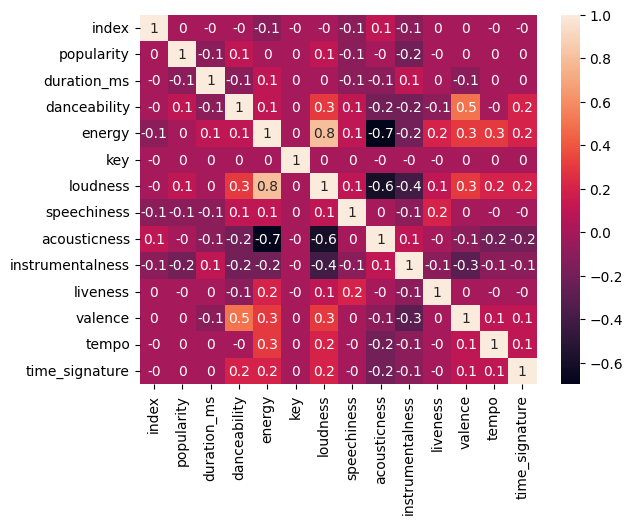

In [11]:
df_corr = round(df.corr(),1)
sn.heatmap(df_corr, annot = True)

In [12]:
pca_df = pd.DataFrame({"energy": df["energy"],"loudness": df["loudness"]})
pca_df

,energy,loudness
0,0.4610,-6.746
1,0.1660,-17.235
2,0.3590,-9.734
3,0.0596,-18.515
4,0.4430,-9.681
...,...,...
83070,0.2350,-16.393
83071,0.1170,-18.318
83072,0.3290,-10.895
83073,0.5060,-10.889


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_frame = scaler.fit_transform(pca_df)
scaled_frame

array([[-0.67276208,  0.34845239],
       [-1.81425848, -1.63637559],
       [-1.06744897, -0.21696528],
       ...,
       [-1.18353335, -0.43666071],
       [-0.49863551, -0.43552533],
       [-0.57215562, -0.30590314]])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 1)
pca.fit(scaled_frame)
pca.explained_variance_ratio_

array([0.88038308])

Our variance ratio of above 80% means that those two features were very highly related, and therefore should be combined into one feature with pca

In [15]:
energy_loudness_combo = pca.transform(pca_df)
df.drop(['energy','loudness'], axis = 1, inplace= True)
df["energy_loudness_combo"] = energy_loudness_combo
df

c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,index,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_loudness_combo
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0.676,1,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,4.444166
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,12.069606
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,6.629126
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,13.049938
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0.618,2,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,6.532252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83070,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0.172,5,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,11.425431
83071,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0.174,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,12.870051
83072,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0.629,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,7.471290
83073,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0.587,7,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,7.341890


sn.pairplot(df, hue = 'track_genre')

We can make predictions from this, such as speechiness having a high variance and thus a high feature importance, and key not so much, we can also see that vast outliers typically don't exist in this dataset; nevertheless, we will still some forms of feature selection

In [16]:
df = df.loc[:,['artists', 'track_name',
       'duration_ms', 'danceability',
       'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'energy_loudness_combo', 'track_genre']]

features = list(df.columns[2:-1])
target = df.columns[-1]
print(features)
print(target)


['duration_ms', 'danceability', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'energy_loudness_combo']
track_genre


TRAINING AND CROSS VALIDATION

In [29]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

We must perform cross validation to determine which model will be most effective with varied testing sets

In [ ]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

dt_score = cross_val_score(dt, df[features],df[target], cv = 10, scoring='accuracy' )
knn_score = cross_val_score(knn, df[features],df[target], cv = 10, scoring='accuracy')
rf_score = cross_val_score(rf, df[features],df[target], cv = 10, scoring='accuracy' )
print("The accuracies for the models are : Decision Tree Classifier: ",dt_score.mean(), "KNeighborsClassifier: ", knn_score.mean(),
      "RandomForestClassifier: ", rf_score.mean())

From this initial Look at the models, we can determine that the RandomForestClassifier gives us the highest accuracy, however it will be much slower than the decision tree classifier, but sinci I'm going for accuracy for this dataset, and not necessarily computational effectiency We will pick random forest over decision tree.

Now we can split the model into the training and test sets

In [21]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.268429691774576


We can better tune this model by finding the appropriate hyperparameters to get the highest accuracy. First since a random forest is made up of decision trees, we can find the best parameters for the decision trees with a random search cross validation follwed up by a  grid search with cross validation

HYPER PARAMETERS WITH CROSS VALIDATION

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_params = {
    'bootstrap':[True,False],
    'max_depth':range(60,120,10),
    'max_features':['log2','sqrt',None],
    'min_samples_leaf':range(0,10,2),
    'min_samples_split':range(5,30,5),
    'n_estimators': range(600,1500,200)
}
rf_rs = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_params, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_score_


In [26]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_hp = RandomForestClassifier()

params = {'bootstrap': [True],
        'max_depth': [50,60,70],
        'min_samples_leaf': [2,4,6],
        'min_samples_split': [3,8,12],
        'n_estimators': [800,900,1000]}
RS = RandomizedSearchCV(estimator=rf_hp,param_distributions=params,cv=3,n_iter= 50, n_jobs=-1, verbose=2, scoring='accuracy')
RS.fit(X_train, y_train)

In [25]:
print('Best Parameters:',RS.best_params_)
print('Best Score:',RS.best_score_)

Best Parameters: {'n_estimators': 800, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': True}
Best Score: 0.2698885808611646


In [27]:
rf = RandomForestClassifier(n_estimators= 800,max_depth = 50,min_samples_split=5,min_samples_leaf=2, max_features= 'sqrt')
rf_score = cross_val_score(rf, df[features],df[target], cv = 10, scoring='accuracy' )
print('Cross Validation Accuracy: ',rf_score)

Cross Validatrion Accuracy:  [0.29826673 0.28791526 0.29874819 0.28562831 0.2877949  0.28734802
 0.27506922 0.27434694 0.27783797 0.26399422]


In [28]:
print('Cross Validation Accuracy: ',rf_score.mean())

Cross Validatrion Accuracy:  0.28369497588305864


We see an accuacy gain of roughly 1 % after two rounds of RSCV, we could see possibly a greater increase in accuracy if we used a grid search cross validation; however, with a random forest classifier that would take an exponentially longer time than the random search.

So know that we have our model with our chosen hyperparemetrs its time to do our Error Metrics

ERROR METRICS

In [32]:
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred, digits=3))
print(metrics.confusion_matrix(y_test,y_pred))


c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic      0.143     0.135     0.139       245
         afrobeat      0.235     0.221     0.228       235
         alt-rock      0.069     0.038     0.049       208
      alternative      0.667     0.067     0.121        60
          ambient      0.283     0.255     0.268       243
            anime      0.220     0.132     0.165       234
      black-metal      0.351     0.523     0.420       239
        bluegrass      0.255     0.409     0.314       259
            blues      0.175     0.041     0.067       170
           brazil      0.150     0.078     0.103       218
        breakbeat      0.245     0.284     0.263       243
          british      0.298     0.084     0.131       202
         cantopop      0.167     0.352     0.227       230
    chicago-house      0.360     0.506     0.421       245
         children      0.342     0.393     0.366       229
            chill      0.193     0.220     0.206       

c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ADDITIONAL ACCURACY WITH DECISION TREES IF RFC IS TOO SLOW

In [34]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 24, min_samples_leaf= 10, min_samples_split= 102)
dt.fit(X_train,y_train)
dt_score= cross_val_score(dt, df[features],df[target], cv = 10, scoring='accuracy' )
print('Cross Validation Accuracy: ',dt_score.mean())

Cross Validation Accuracy:  0.19242826542273198
